In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [60]:
DF = pd.read_csv('data/survey_results_public_mega_inc.csv')

/home/jvanderwolf/projects/school/codam/events/no-bias-no-cry/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (11,12,13,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.



In [61]:
"""
Sexual Orientation.
1. Amount of people who haven't answered the question
2. Plot grouped by Respondent with a count() on SexualOrientation
"""

"\nSexual Orientation.\n1. Amount of people who haven't answered the question\n2. Plot grouped by Respondent with a count() on SexualOrientation\n"

In [63]:
# data cleanup
df = DF.copy()
df['SexualOrientation'] = df['SexualOrientation'].replace(np.nan, 'Not Answered')
df['Eployment'] = df['Employment'].replace(np.nan, 'Unknown')
df['Age'] = df['Age'].replace({
    'Under 18 years old': 0,
    '18 - 24 years old': 1,
    '25 - 34 years old': 2,
    '35 - 44 years old': 3,
    '45 - 54 years old': 4,
    '55 - 64 years old': 5,
    '65 years or older': 6
})

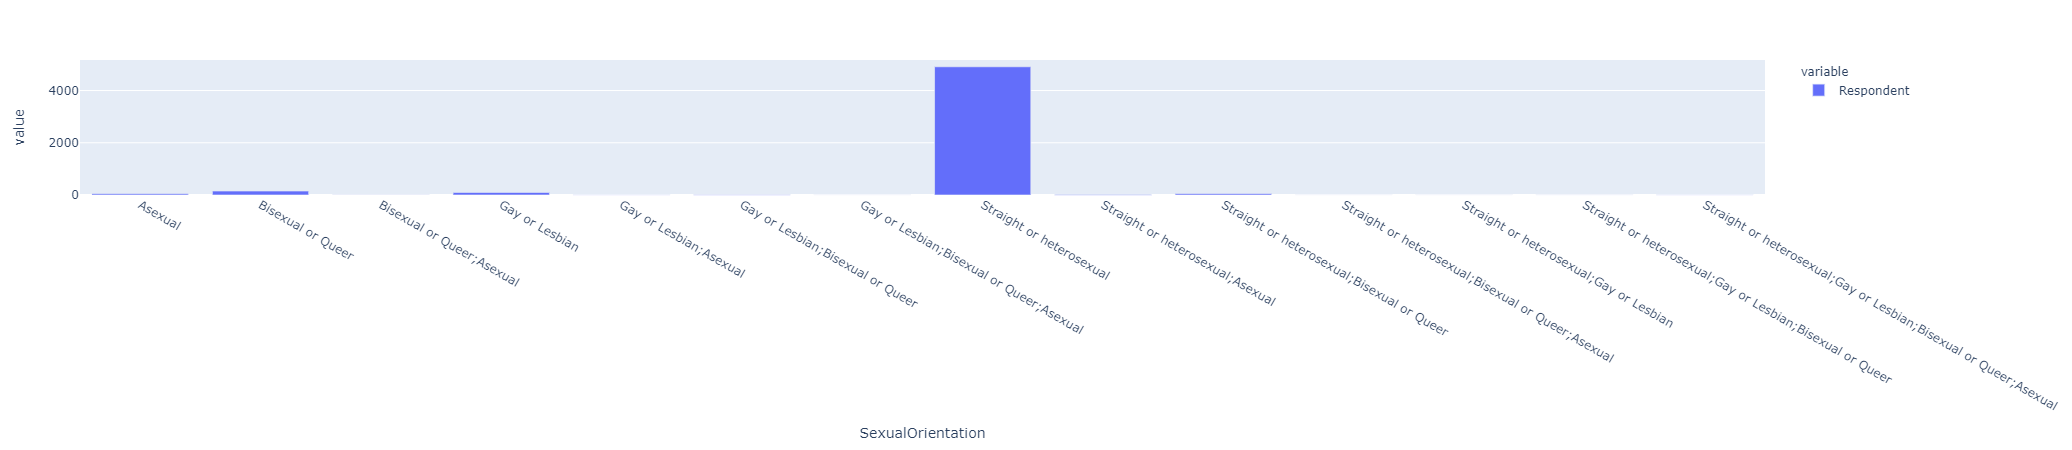

In [208]:
"""
Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.
"""
grouped_df = df[(df['Country'] == 'Netherlands') | (df['Country'] == 'Germany')].groupby(['SexualOrientation'], dropna=False)['Respondent'].count()
orientation_bar = px.bar(grouped_df)
orientation_bar.show()

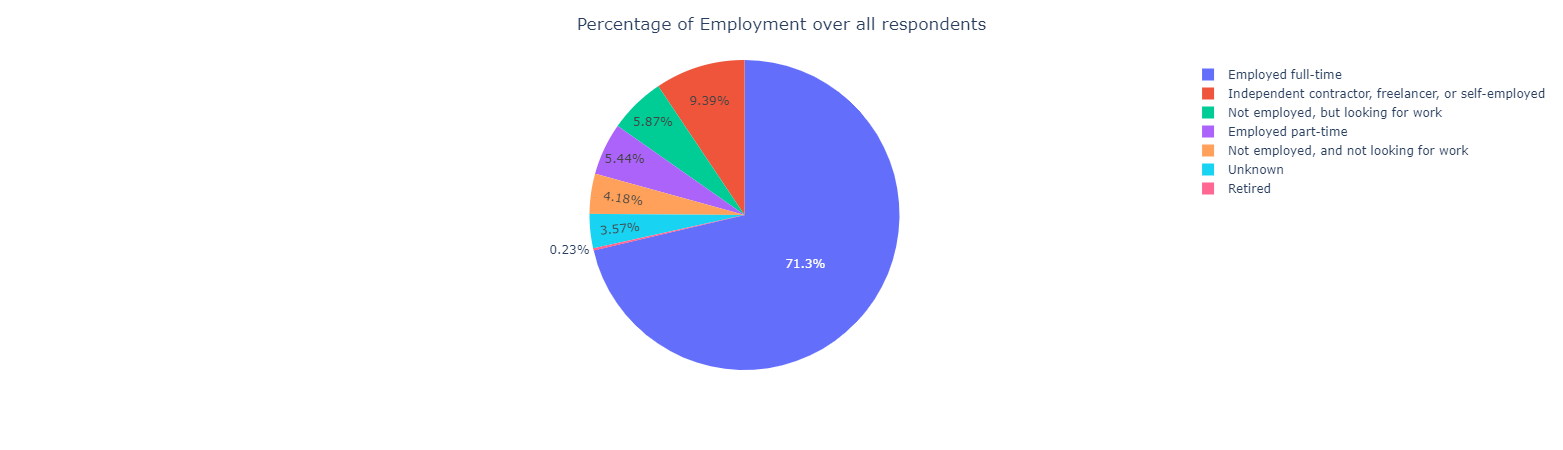

In [98]:
"""
Which of the following best describes your current employment status? (if "not employed" or "No", then the person is not working for the company anymore)
"""
grouped_df = df.groupby(['Employment'], as_index=False, dropna=False)['Respondent'].count()
employment_pie = px.pie(grouped_df, values='Respondent', names='Employment')
employment_pie.update_layout(title_text='Percentage of Employment over all respondents', title_x=0.5)
employment_pie.show()

In [90]:
df['Dependents'] = df['Dependents'].replace(np.nan, 'Unknown')

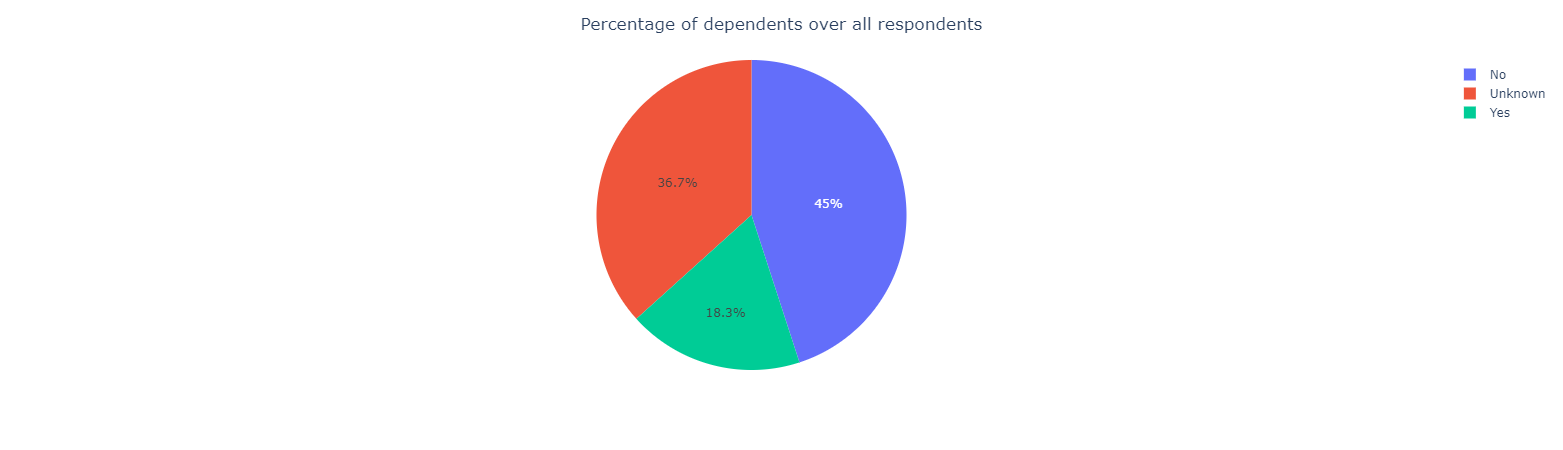

In [97]:
"""
Do you have any children or other dependents that you care for? If you prefer not to answer, you may leave this question blank.
"""
grouped_df = df.groupby(['Dependents'], as_index=False, dropna=False)['Respondent'].count()
dependents_pie = px.pie(grouped_df, values='Respondent', names='Dependents')
dependents_pie.update_layout(title_text='Percentage of dependents over all respondents', title_x=0.5)
dependents_pie.show()

In [100]:
import matplotlib.pyplot as plt

In [139]:
regression_df = df.copy()
regression_df = regression_df[(regression_df['ConvertedSalary'].notnull()) & (regression_df['Age'].notnull())]

Estimated coefficients:
b_0 = 26944.922219659784        
b_1 = 32590.544234092995


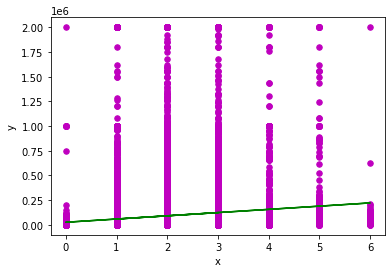

In [141]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

# observations / data
y = np.array(regression_df['ConvertedSalary'])
x = np.array(regression_df['Age'])

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(x, y, b)

In [201]:
# create a new copy
df = DF.copy()

# create a new grouped dataframe with only specific countries grouping by Gender and Sexual Orientation
grouped_df = df[(df['Country'] == 'Netherlands') |
                (df['Country'] == 'Germany') |
                (df['Country'] == 'United Kingdom')
].groupby(['Gender', 'SexualOrientation'], as_index=False, dropna=False)['Respondent'].count()

# filter out where people haven't answered one of the two questions
grouped_df = grouped_df[(grouped_df['Gender'].notnull()) & (grouped_df['SexualOrientation'].notnull())]

# combine columns
grouped_df['gender_sex'] = grouped_df['Gender'].astype(str) + ' ' + grouped_df['SexualOrientation'].astype(str)

# drop old columns
grouped_df = grouped_df.drop(columns=['Gender', 'SexualOrientation'])

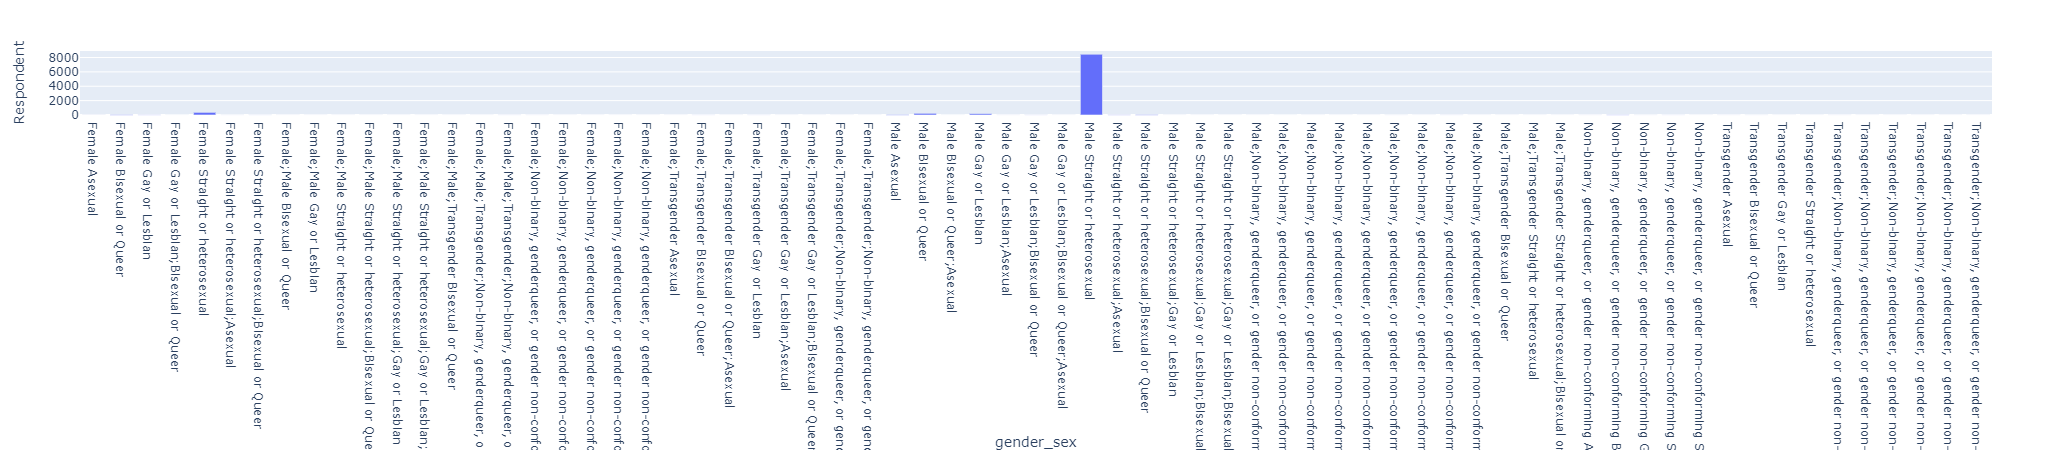

In [207]:
orientation_bar = px.bar(grouped_df, x='gender_sex', y='Respondent')
orientation_bar.show()

In [206]:
grouped_df

,Respondent,gender_sex
0,7,Female Asexual
1,56,Female Bisexual or Queer
2,26,Female Gay or Lesbian
3,3,Female Gay or Lesbian;Bisexual or Queer
4,371,Female Straight or heterosexual
...,...,...
72,1,"Transgender;Non-binary, genderqueer, or gender..."
73,1,"Transgender;Non-binary, genderqueer, or gender..."
74,1,"Transgender;Non-binary, genderqueer, or gender..."
75,1,"Transgender;Non-binary, genderqueer, or gender..."
